## Codes for JIA synovium study 

*Jun Inamo*

*jun.inamo@cuanschutz.edu*

*Computational Omics and Systems Immunology (COSI) Lab, Division of Rheumatology and Center for Health AI, University of Colorado School of Medicine, CO, USA*


In [1]:
format(Sys.Date(), "%Y-%m-%d")

[1] "2025-07-08"

In [2]:
options(warn = -1)  
options("verbose" = FALSE)
options("show.error.messages" = TRUE)  
Sys.setlocale("LC_CTYPE", "en_US.UTF-8")

[1] "en_US.UTF-8"

In [3]:
suppressMessages({
    source("./utils.R")
    library(gridExtra)
})

Load Seurat object of QCed data

In [4]:
ste = readRDS(paste0("./output/Xenium_merged_final.rds"))
DefaultAssay(ste) = "SCT"

Assign annotated cluster names

In [5]:
celltype="ALL"
resolution <- switch(celltype,
                     "ALL" = "0.20",
                     "T" = "1.00",
                     "M" = "0.20",
                     "B" = "0.40",
                     "Tissue" = "0.60"
)

cluster_col = "res_subtype" 
Idents(ste) = factor(ste@meta.data[,cluster_col])
DefaultAssay(ste) = "SCT"

cluster_df = read.csv("./cluster_annotation.csv")

cluster_COLORS <- manual_colors[1:length(unique(Idents(ste)))]
names(cluster_COLORS) = levels(Idents(ste))

cur_levels <- levels(Idents(ste))
df <- data.frame(level = cur_levels, stringsAsFactors = FALSE)
df$prefix <- sub("^([^-]+)-.*", "\\1", df$level)
df$num <- as.integer(sub("^[^-]+-(\\d+):.*", "\\1", df$level))
prefix_order <- c("T", "B", "M", "Tissue")
df$prefix_factor <- factor(df$prefix, levels = prefix_order)
df_sorted <- df[order(df$prefix_factor, df$num), ]
new_levels <- df_sorted$level
Idents(ste) <- factor(Idents(ste), levels = new_levels)

T_grad <- colorRampPalette(c("#ACD9AE99", "#358A3999"))(25)
Tissue_grad <- colorRampPalette(c("#FFEBED99", "#B71B1B99"))(25)
B_grad <- colorRampPalette(c("#C8B9E599", "#311A9299"))(25)
M_grad <- colorRampPalette(c("gold", "goldenrod3"))(25)
cluster_COLORS_ = c(T_grad[1:length(grep("^T-",levels(Idents(ste))))],
                    B_grad[1:length(grep("^B-",levels(Idents(ste))))],
                    M_grad[1:length(grep("^M-",levels(Idents(ste))))],
                    Tissue_grad[1:length(grep("^Tissue-",levels(Idents(ste))))])
names(cluster_COLORS_) = levels(Idents(ste))
cluster_COLORS_[grepl("venule",names(cluster_COLORS_))] = "grey40"
cluster_COLORS_[grepl("arteriolar",names(cluster_COLORS_))] = "grey70"
cluster_COLORS_[grepl("lymphatic",names(cluster_COLORS_))] = "grey90"
cluster_COLORS_[grepl("mixed",names(cluster_COLORS_))] = "white"

clus = ste@meta.data[,cluster_col] %>% 
  unique() %>%
  stringr::str_split(.,pattern = ":", simplify = TRUE) %>%
  .[,2]
cluster_COLORS__ = manual_colors
names(cluster_COLORS__) = clus
cluster_COLORS__ = na.omit(cluster_COLORS__)

cluster_colors_df <- data.frame(
  cluster =  ste@meta.data[,cluster_col] %>% 
    unique(),
  color = cluster_COLORS__[!is.na(names(cluster_COLORS__))],
  stringsAsFactors = FALSE
)

cluster_colors_df$clean_name <- sub("^[^:]+:", "", cluster_colors_df$cluster)

cluster_colors_mod_df <- data.frame(
  cluster = names(cluster_COLORS_),
  color = cluster_COLORS_,
  stringsAsFactors = FALSE
)

cluster_colors_mod_df$clean_name <- sub("^[^:]+:", "", cluster_colors_mod_df$cluster)

replace_indices <- cluster_colors_df$clean_name %in% cluster_colors_df$clean_name

cluster_colors_df$color[replace_indices] <- cluster_colors_mod_df$color[match(cluster_colors_df$clean_name[replace_indices], cluster_colors_mod_df$clean_name)]

cluster_COLORS__ <- setNames(cluster_colors_df$color, cluster_colors_df$clean_name)


ste@meta.data$new_cluster = factor(stringr::str_split(ste@meta.data$res_subtype,pattern=":",simplify=TRUE)[,2], 
                                   levels = unique(stringr::str_split(levels(Idents(ste)),pattern=":",simplify=TRUE)[,2])) 
Idents(ste) = ste@meta.data$new_cluster

ord = levels(Idents(ste))
ord = c(ord[!grepl("venule|arteriolar|lymphatic|mixed",ord)],
        ord[grepl("venule|arteriolar|lymphatic|mixed",ord)])
Idents(ste) = factor(Idents(ste), levels = ord)
ord = levels(Idents(ste))
ord = c(ord[!grepl("mixed",ord)],
        ord[grepl("mixed",ord)])
Idents(ste) = factor(Idents(ste), levels = ord)

cluster_COLORS__ = cluster_COLORS__[levels(Idents(ste))]
cluster_COLORS__tmp = cluster_COLORS__
names(cluster_COLORS__tmp) = c("CD4 naïve","CD4 memory","Treg","TPH_TFH","Th1-like Tph",
                               "CD8 naïve","GZMK+ CD8","GZMB+ CD8","IFN stimulated CD8 memory","TRM","Innate-like T",
                               "gdT",
                               "ILCs",
                               "NK cells",
                               "B","plasmablast","plasma",
                               "MERTK+ macrophage","TREM2+ macrophage","pro-inflammatory  macrophage","stressed macrophage",
                               "DC1","DC2","pDC","mregDC","mast cell",
                               "proliferating cells",
                               "PRG4+ lining fibroblast","PRG4+DKK3+ lining fibroblast",
                               "CXCL12+DKK3+ intermediate fibroblast","RSPO3+ intermediate fibroblast",
                               "POSTN+ sublining fibroblast","NOTCH3+ sublining fibroblast","CD34+PI16+DPP4+ sublining","CXCL12+ sublining fibroblast",
                               "muscle",
                               "venule","NOTCH4+ arteriolar","lymphatic",
                               "mixed")
cluster_COLORS__ = cluster_COLORS__tmp
cluster_COLORS__[names(cluster_COLORS__)=="NK cells"]="turquoise"
cluster_COLORS__[names(cluster_COLORS__)=="ILCs"]="darkblue"
Idents(ste) = factor(Idents(ste), levels = names(cluster_COLORS__))

cluster_col = "new_cluster"

In [6]:
table(Idents(ste))
sum(table(Idents(ste)))


                           CD4 naïve                           CD4 memory 
                                 624                                 5828 
                                Treg                              TPH_TFH 
                                2150                                 1828 
                        Th1-like Tph                            CD8 naïve 
                                 793                                 3425 
                           GZMK+ CD8                            GZMB+ CD8 
                                9680                                  477 
           IFN stimulated CD8 memory                                  TRM 
                                 794                                 1463 
                       Innate-like T                                  gdT 
                                 895                                 2210 
                                ILCs                             NK cells 
                        

[1] 430119

### Spatial neighborhood analysis

See https://github.com/juninamo/spatialCooccur/tree/master/vignettes for simulation data and other 10X datasets

Following code is for our Xenium dataset, which is a spatial transcriptomics dataset of JIA synovium.

```r

ste <- nhood_enrichment(
  ste,
  cluster_key = cluster_col, 
  neighbors.k = 30, 
  connectivity_key = "nn", 
  transformation = TRUE,
  n_perms = n_perms, seed = 1234, n_jobs = n_jobs
)
                        
```

In [7]:

mat = ste@misc$new_cluster_nhood_enrichment$zscore
colnames(mat) = gsub("^Cluster","",colnames(mat))
rownames(mat) = gsub("^Cluster","",rownames(mat))
mat = mat[rownames(mat)!="mixed",]
mat = mat[,colnames(mat)!="mixed"]
mat = mat[rownames(mat)!="muscle",]
mat = mat[,colnames(mat)!="muscle"]
mat = mat[rownames(mat)!="proliferating cells",]
mat = mat[,colnames(mat)!="proliferating cells"]
mat

,CD4 memory,GZMK+ CD8,CD8 naïve,gdT,Treg,TPH_TFH,ILCs,TRM,NK cells,Innate-like T,...,CXCL12+ sublining fibroblast,NOTCH3+ sublining fibroblast,venule,CXCL12+DKK3+ intermediate fibroblast,POSTN+ sublining fibroblast,NOTCH4+ arteriolar,PRG4+DKK3+ lining fibroblast,lymphatic,CD34+PI16+DPP4+ sublining,RSPO3+ intermediate fibroblast
CD4 memory,1.526911212,0.74469599,0.039062155,-0.4361225,-0.4609127,-0.4831374,-0.6428996,-0.5681857,-0.5431160,-0.6053143,...,1.703049301,0.88236887,1.07780787,-0.19854122,-0.07611659,-0.4659562729,-0.23985991,-0.43855982,-0.6980869,-0.7064830
GZMK+ CD8,0.131548195,2.20155608,-0.294760367,-0.4022195,-0.4808211,-0.4546232,-0.6647630,-0.5016815,-0.5690312,-0.6563256,...,1.030473337,0.34380956,0.59655631,-0.37054396,0.53178779,-0.5116469108,-0.02664635,-0.43998885,-0.7281122,-0.7205372
CD8 naïve,0.605766192,0.59306350,2.876291652,-0.4681530,-0.3099855,-0.4083823,-0.5695855,-0.6308130,-0.4460856,-0.5758360,...,0.522030522,0.84925495,1.18031239,-0.54534079,-0.32229369,-0.5505681907,-0.59918695,-0.51473918,-0.6462165,-0.7142083
gdT,0.112002508,0.81071442,-0.302607151,0.7545071,-0.4771759,-0.4932118,-0.7170230,-0.3872552,-0.5565309,-0.6671082,...,1.195961565,0.32184819,0.56140364,-0.25930814,-0.03684190,-0.5185745654,0.06809056,-0.51917296,-0.7094289,-0.7188281
Treg,0.053093922,0.51256279,-0.057495874,-0.4714428,0.5729715,-0.3924696,-0.6763199,-0.5864736,-0.5738701,-0.6658527,...,1.211225887,0.41309051,0.58607895,-0.40904181,0.15930755,-0.5007246976,-0.13439155,-0.49818339,-0.7292870,-0.7187273
TPH_TFH,0.086237206,0.81408600,-0.114101474,-0.4352164,-0.3548226,1.2224501,-0.6833559,-0.5513372,-0.5464158,-0.6947480,...,0.346591728,-0.10780541,-0.07396257,-0.60015748,-0.38946648,-0.6435796103,-0.11851660,-0.55634591,-0.7561848,-0.7303952
ILCs,-0.208374274,0.04883396,-0.257044352,-0.6656875,-0.5990956,-0.6332456,4.6223779,-0.6768899,-0.6197611,-0.6783769,...,2.898627111,1.04590428,1.74591630,0.08631295,-0.49458582,-0.5023717141,-0.17829570,-0.43412168,-0.4616138,-0.4670111
TRM,-0.004016763,0.96183163,-0.472308182,-0.2003600,-0.5022042,-0.4944809,-0.6889040,0.8175473,-0.5791858,-0.6922256,...,0.932520493,0.26745241,0.25523207,-0.09990129,-0.07765875,-0.4996665583,0.46129269,-0.52008231,-0.6787408,-0.7438234
NK cells,0.238842975,0.69892897,0.022032101,-0.4164387,-0.4699940,-0.4748301,-0.5977510,-0.5691351,0.5710006,-0.6284772,...,1.331567483,0.55920014,0.97261137,-0.27031102,0.01726801,-0.5086456711,-0.21933154,-0.47719063,-0.6970683,-0.7159153
Innate-like T,0.269679524,0.51146280,-0.032303912,-0.4933762,-0.5405216,-0.6074215,-0.6395692,-0.6392719,-0.5682430,0.5284083,...,2.891000410,1.39846765,1.76409602,-0.12270683,-0.16979839,-0.3632837860,-0.43556264,-0.46349972,-0.6541936,-0.6454173


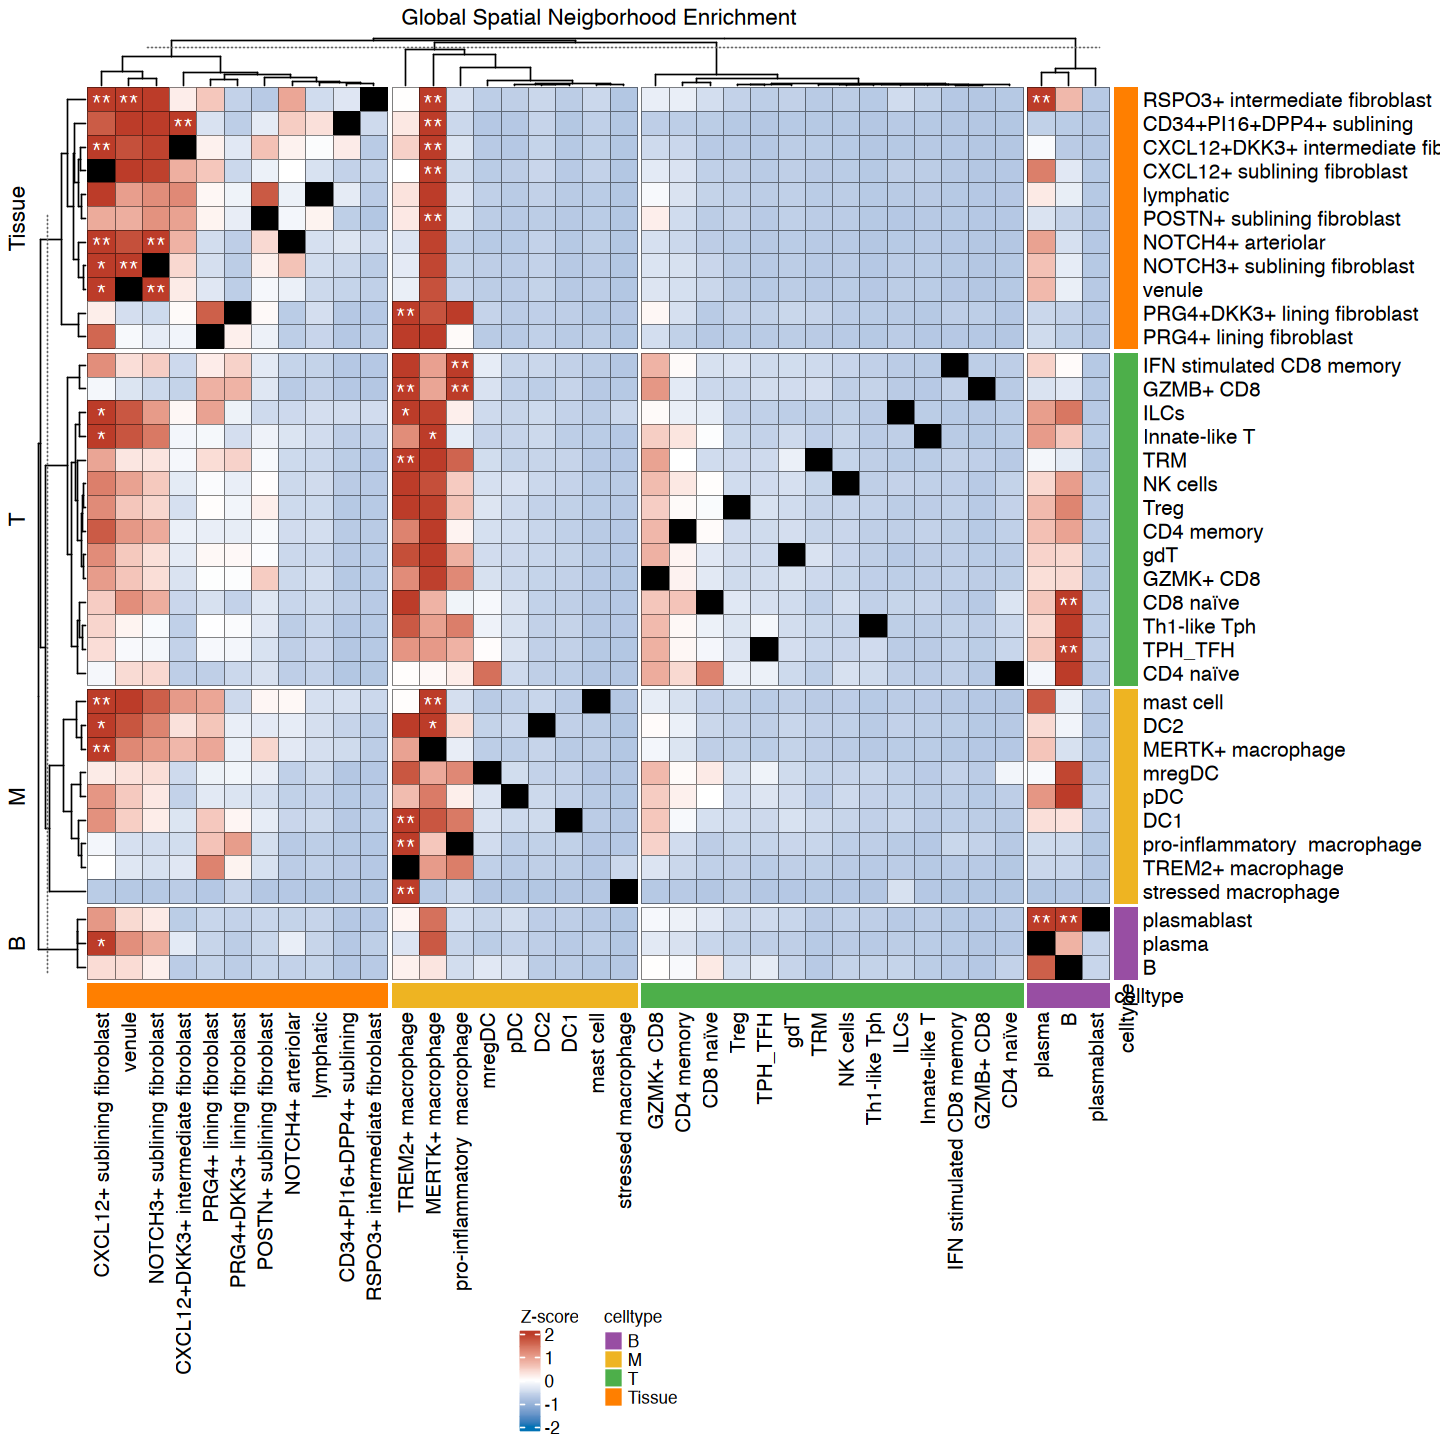

In [8]:
pval_mat <- 1 - pnorm(mat)
fdr_vec <- p.adjust(as.vector(pval_mat), method = "BH")
fdr_mat <- matrix(fdr_vec, nrow=nrow(mat), ncol=ncol(mat),
                  dimnames = dimnames(mat))
sig_mat <- ifelse(fdr_mat < 0.05, "**", ifelse(fdr_mat > 0.05 & fdr_mat < 0.1, "*", ""))

ha = rowAnnotation(celltype = ifelse(rownames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="T"]), "T",
                                     ifelse(rownames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="B"]), "B",
                                            ifelse(rownames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="M"]), "M",
                                                   ifelse(rownames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="Tissue"]), "Tissue", "")))),
                   col = list(celltype = c("T" = "#4DAF4A",
                                           "B" = "#984EA3",
                                           "M" = "goldenrod2",
                                           "Tissue" = "#FF7F00")))
column_ha = HeatmapAnnotation(celltype = ifelse(colnames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="T"]), "T",
                                                ifelse(colnames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="B"]), "B",
                                                       ifelse(colnames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="M"]), "M",
                                                              ifelse(colnames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="Tissue"]), "Tissue", "")))),
                              col = list(celltype = c("T" = "#4DAF4A",
                                                      "B" = "#984EA3",
                                                      "M" = "goldenrod2",
                                                      "Tissue" = "#FF7F00")))

common_names <- intersect(rownames(mat), colnames(mat))
for (nm in common_names) {
  mat[nm, nm] <- NA
  sig_mat[nm, nm] <- ""
}

heatmap <- Heatmap(mat,
                   name = "Z-score",
                   col = colorRamp2(c(-2, 0, 2), c("#0072B5FF", "white", "#BC3C29FF")), 
                   show_row_names = TRUE, 
                   show_column_names = TRUE,  
                   cluster_rows = TRUE,  
                   cluster_columns = TRUE,  
                   #show_column_dend = FALSE,
                   #show_row_dend = FALSE,
                   row_title = "",  
                   column_title = "Global Spatial Neigborhood Enrichment",
                   bottom_annotation = column_ha,
                   right_annotation = ha,
                   rect_gp = gpar(col = "black", lwd = 0.3),
                   column_split = ifelse(colnames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="T"]), "T",
                                         ifelse(colnames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="B"]), "B",
                                                ifelse(colnames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="M"]), "M",
                                                       ifelse(colnames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="Tissue"]), "Tissue", "")))),
                   row_split = ifelse(rownames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="T"]), "T",
                                      ifelse(rownames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="B"]), "B",
                                             ifelse(rownames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="M"]), "M",
                                                    ifelse(rownames(mat) %in% unique(Idents(ste)[ste@meta.data$celltype=="Tissue"]), "Tissue", "")))),
                   na_col = "black",          

                   cell_fun = function(j, i, x, y, width, height, fill) {
                     if(sig_mat[i, j] == "**") {
                       grid.text("**", 
                                 x = x,
                                 y = y - 0.2 * height,  
                                 gp = gpar(fontsize = 15, col = "white", fontface = "bold"))
                     }
                     if(sig_mat[i, j] == "*") {
                       grid.text("*", 
                                 x = x,
                                 y = y - 0.2 * height,  
                                 gp = gpar(fontsize = 15, col = "white", fontface = "bold"))
                     }
                   }
)

options(repr.plot.width = 12, repr.plot.height = 12)
draw(heatmap, 
     merge_legend = TRUE,
     heatmap_legend_side = "bottom", 
     annotation_legend_side = "bottom")



### Fibroblast-endothelial cell interaction

In [9]:
max_dist = 300

coords_df = data.frame()
for (name in c("SB4","SB14","SB10","SB19","SB25","SB21","SB29","SB30","SB62")) {
  coords <- ste[[name]]$centroids@coords %>%
    as.data.frame() %>%
    dplyr::mutate(cell = Cells(ste[[name]]))
  cells <- coords$cell
  rownames(coords) <- cells
  coords <- as.matrix(coords[, c("x", "y")])
  dim(coords)
  coords_df_ = as.data.frame(coords) %>%
    dplyr::mutate(cell_id = cells,
                  sample_id = name) %>%
    dplyr::left_join(.,ste@meta.data[,c("cell",cluster_col)] %>% dplyr::rename(cell_id = cell),by="cell_id")
  
  end_cells <- coords_df_ %>% dplyr::filter(grepl("arteriolar|venule",!!sym(cluster_col)))
  fib_cells <- coords_df_ %>% dplyr::filter(grepl("fibroblast",!!sym(cluster_col)))
  
  res <- RANN::nn2(data = end_cells[,1:2], query = fib_cells[,1:2], k = 1)
  
  dist_to_nearest_end <- res$nn.dists[, 1]  
  
  fib_cells$dist_nearest_end <- dist_to_nearest_end
  
  
  coords_df = rbind(coords_df, fib_cells)
}
coords_df = coords_df %>%
  dplyr::left_join(.,
                   t(ste[["SCT"]]$data[,coords_df$cell_id]) %>%
                     as.data.frame() %>%
                     dplyr::mutate(cell_id = coords_df$cell_id),
                   by="cell_id")
coords_df = coords_df %>%
  dplyr::filter(dist_nearest_end < max_dist) 
coords_df[1:5,1:10]


,x,y,cell_id,sample_id,new_cluster,dist_nearest_end,A2ML1,AAMP,AAR2,AARSD1
,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2250.838,676.4049,SB4_aabehemd-1,SB4,CXCL12+ sublining fibroblast,16.94456,0,0,0,0.0000000
2,2495.893,674.1057,SB4_aabgdpha-1,SB4,PRG4+ lining fibroblast,41.03892,0,0,0,0.0000000
3,3634.274,1649.4292,SB4_aakmmanl-1,SB4,NOTCH3+ sublining fibroblast,67.67239,0,0,0,0.0000000
4,2560.759,869.2934,SB4_abcjjocb-1,SB4,CXCL12+ sublining fibroblast,33.13169,0,0,0,0.0000000
5,2571.284,875.8229,SB4_abdfpnce-1,SB4,CXCL12+ sublining fibroblast,25.19720,0,0,0,0.6931472


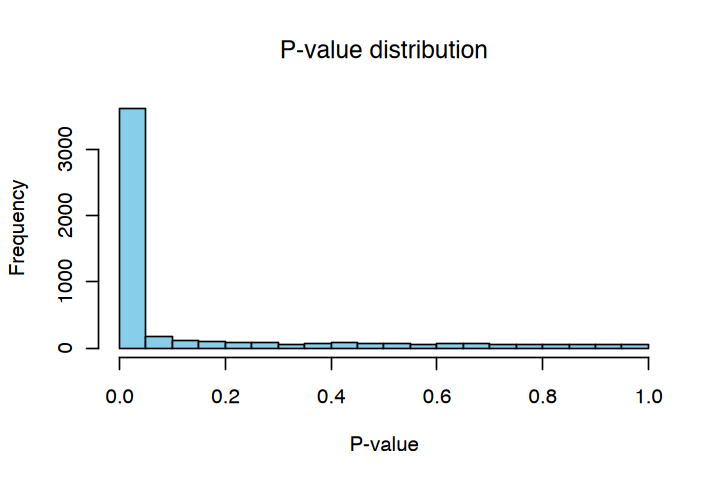

In [10]:

gene_cols <- names(coords_df)[7:ncol(coords_df)]

res_list <- lapply(gene_cols, function(g) {
  test_res <- cor.test(coords_df[["dist_nearest_end"]], coords_df[[g]], 
                       method = "spearman",  
                       use = "pairwise.complete.obs")
  c(correlation = test_res$estimate, pval = test_res$p.value)
})

res_cor_df <- do.call(rbind, res_list) |> 
  as.data.frame()

res_cor_df$gene <- gene_cols
options(repr.plot.width = 6, repr.plot.height = 4)
hist(res_cor_df$pval, breaks = 20, col = "skyblue", main = "P-value distribution", xlab = "P-value")

res_cor_df$adj_pval <- p.adjust(res_cor_df$pval, method = "BH")


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


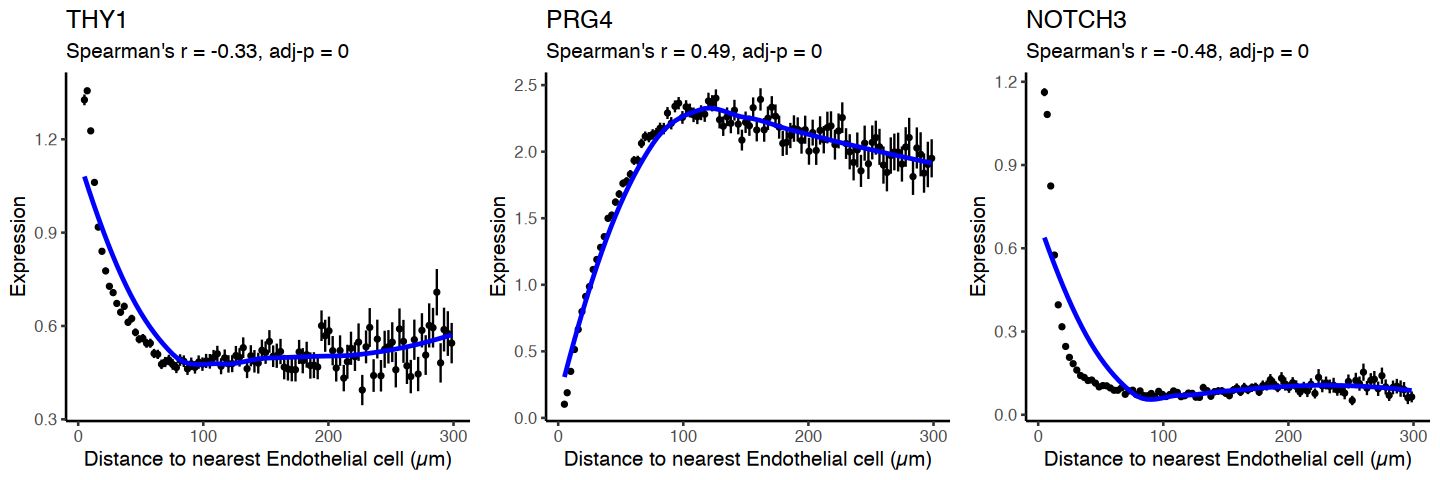

In [11]:

options(repr.plot.width = 12, repr.plot.height = 4)

myplots = list()
for(GENE in c("THY1","PRG4","NOTCH3")){
  i = grep(GENE,c("THY1","PRG4","NOTCH3"))
  
  coef = res_cor_df %>%
    dplyr::filter(gene == GENE) %>%
    .[,"correlation.rho"]
  adj_pval = res_cor_df %>%
    dplyr::filter(gene == GENE) %>%
    .[,"adj_pval"]
  
  df_plot <- coords_df %>%
    dplyr::select(cell_id, dist_nearest_end, all_of(GENE)) %>%
    dplyr::rename(gene_expr = !!GENE) %>%  
    dplyr::filter(!is.na(dist_nearest_end), !is.na(gene_expr))
  
  n_bins <- 100
  df_binned <- df_plot %>%
    dplyr::mutate(
      dist_bin = cut(dist_nearest_end, breaks = n_bins) 
    ) %>%
    dplyr::group_by(dist_bin) %>%
    dplyr::summarise(
      dist_mean   = mean(dist_nearest_end),
      expr_mean   = mean(gene_expr),
      expr_sd     = sd(gene_expr),
      n          = n(),
      .groups = "drop"
    ) %>%
    dplyr::mutate(expr_se = expr_sd / sqrt(n)) %>% 
    dplyr::filter(n > 10)
  
  p <- ggplot() +
    geom_errorbar(
      data = df_binned,
      aes(x = dist_mean, ymin = expr_mean - expr_se, ymax = expr_mean + expr_se),
      width = 0, color = "black"
    ) +
    geom_point(
      data = df_binned,
      aes(x = dist_mean, y = expr_mean),
      color = "black", size = 1
    ) +
    geom_smooth(
      data = df_binned,
      aes(x = dist_mean, y = expr_mean),
      method = "loess", se = FALSE, color = "blue"
    ) +
    theme_classic(base_size = 12) +
    labs(
      x = "Distance to nearest Endothelial cell (µm)",
      y = paste("Expression"),
      title = GENE,
      subtitle = paste0(
        "Spearman's r = ", round(coef, 2),
        ", adj-p = ", signif(adj_pval, 3)
      )
    )
  myplots[[i]] = p
}
p <- do.call("grid.arrange", c(myplots, nrow = 1))

